## Submitted by
- Rahul Kumar Verma 
- Aman Thakur       

## Libraries Used

- Pandas         : Used for exploring, preprocessing, analyzing the dataset
- Numpy          : Used for performing the mathematical operations
- Matplotlib     : Used for visualization
- sklearn        : Provides a selection of efficient tools for machine learning and statistical modeling

## Data Pre-processing

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("alzheimer.csv")

In [3]:
#reading the dataset

data = pd.read_csv("alzheimer.csv")
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
#number of rows and columns in the data

data.shape

(373, 10)

In [5]:
#columunar description of the types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [6]:
#statistical features of the data

data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
#checking for null values

data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [8]:
#replacing the missing values in column "SES" with mean

SES_mean = data['SES'].mean()
data['SES'].fillna(SES_mean, inplace=True)

In [9]:
#replacing the missing values in column "MMSE" with mean

MMSE_mean = data['MMSE'].mean()
data['MMSE'].fillna(MMSE_mean, inplace=True)

In [10]:
#checking again for null values - all nulls have been replaced by the mean

data.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [11]:
#dropping all duplicate values. Fortunately no duplicates were found.

data.drop_duplicates()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [12]:
type(data)

pandas.core.frame.DataFrame

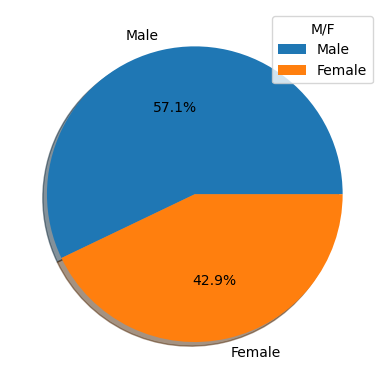

In [13]:
#visualizing the gender divide in the dataset

labels_data=['Male','Female']
plt.pie(data['M/F'].value_counts(),labels=labels_data,shadow = True,autopct='%1.1f%%')
plt.legend(title = "M/F")

plt.show()

<AxesSubplot:xlabel='Group', ylabel='count'>

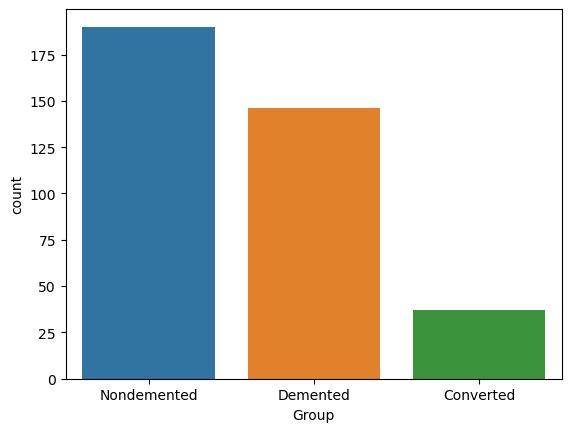

In [14]:
#Countplot for "Groups" i.e. Nondemented, Demented and Converted -- (visulizing the dependent variable divisions)

sns.countplot(x="Group", data=data)

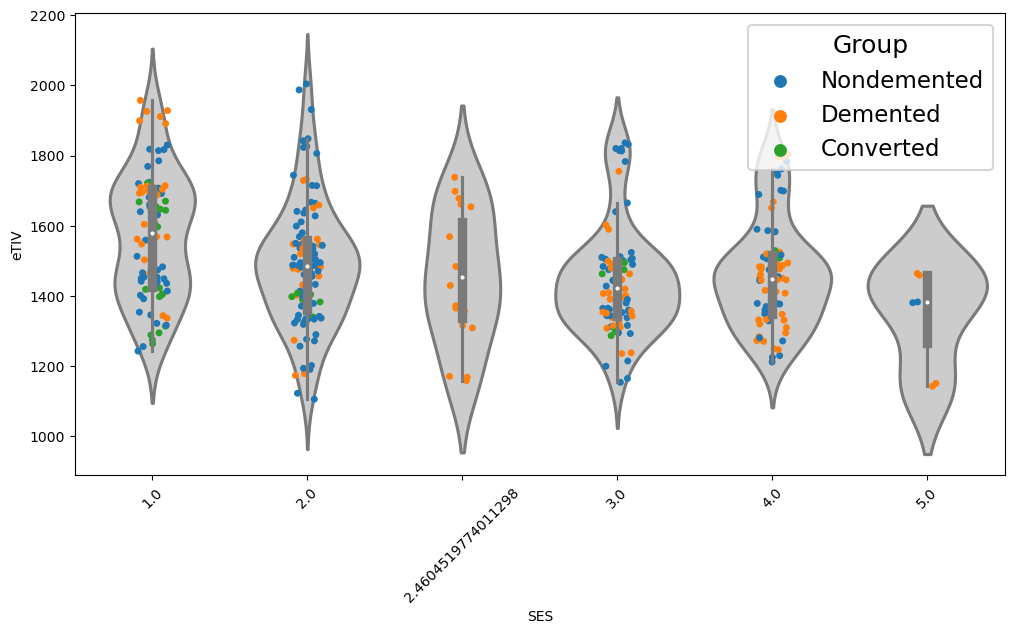

In [15]:
# Violin plot overlapped with stripplot to show concentration and scattering of data

fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("talk")

sns.violinplot(x="SES", y="eTIV", data=data, color="0.8")
sns.stripplot(x="SES", y="eTIV", data=data, hue="Group" , jitter=True, zorder=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [16]:
#Converting the Dependent variable (Group) to numerical numbers --> Converted[0], Demeted [1], Nondemented [2]

data['Group']= data['Group'].replace(['Converted','Demented','Nondemented'],[0,1,2])

In [17]:
data['Group']

0      2
1      2
2      1
3      1
4      1
      ..
368    1
369    1
370    2
371    2
372    2
Name: Group, Length: 373, dtype: int64

### Pairplot

- This plot will show pairwise relationships between variables.

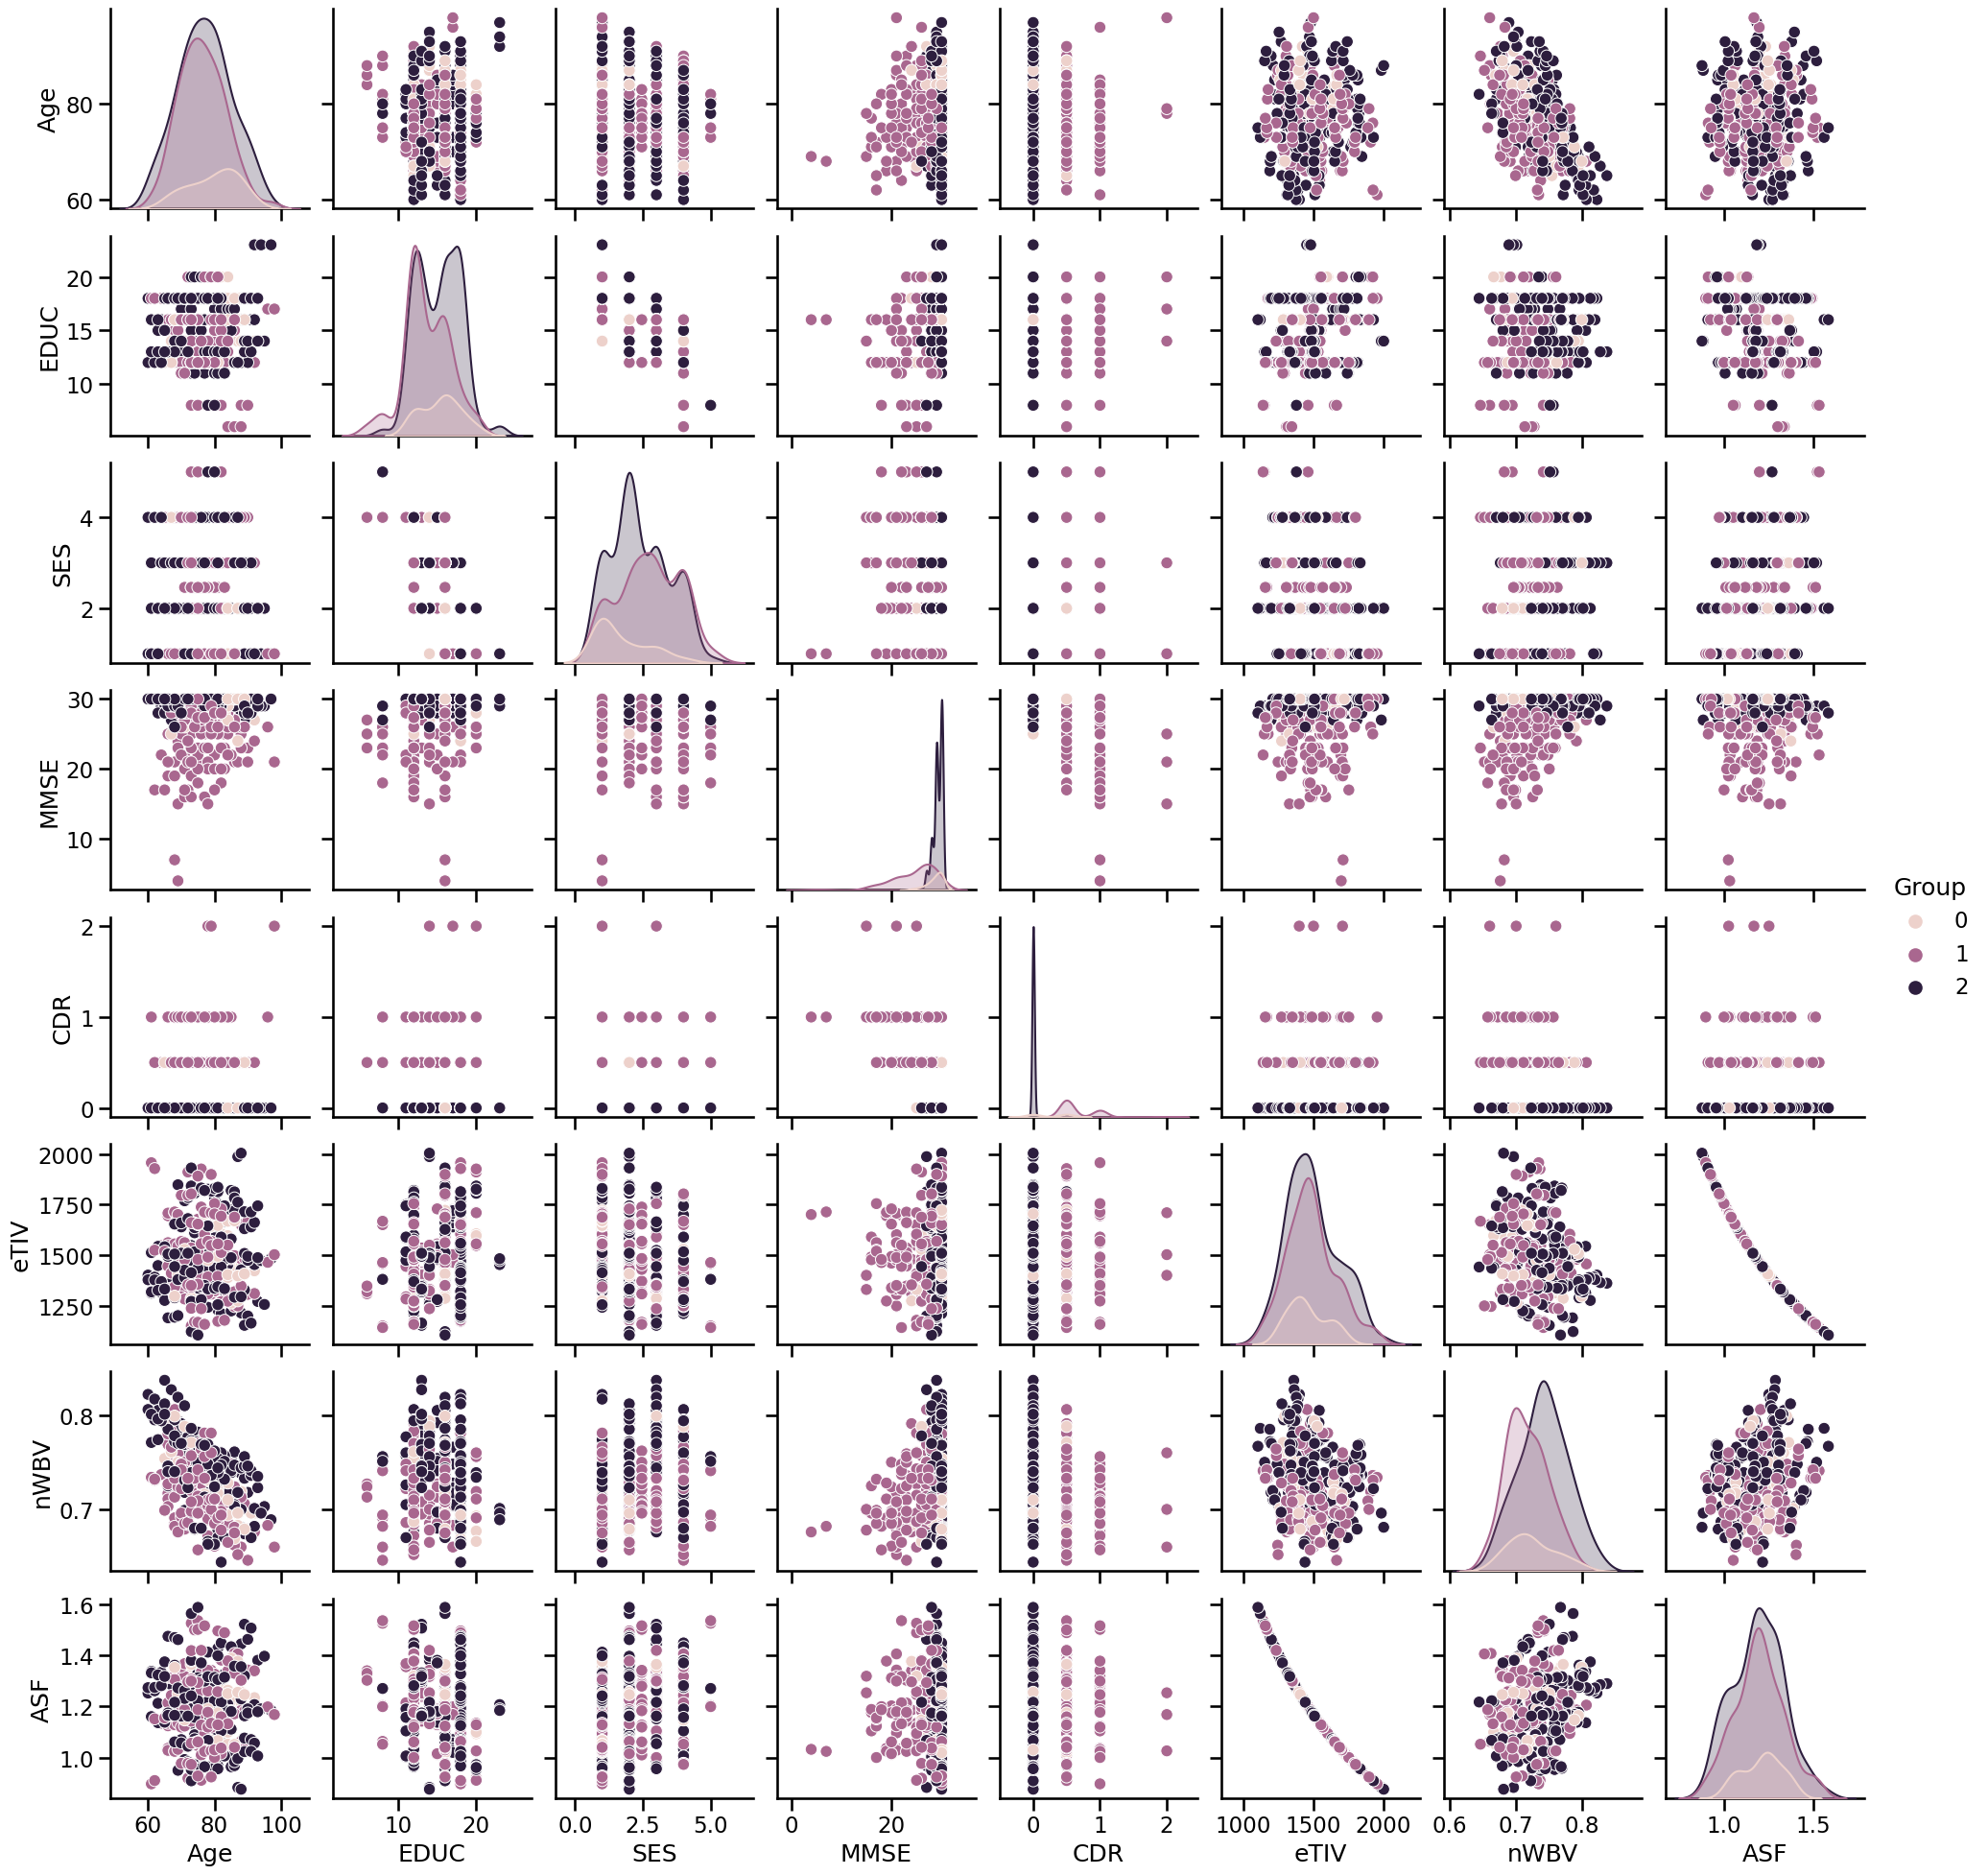

In [18]:
sns.pairplot(data, hue="Group")

In [19]:
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [20]:
# splitting the data into X --> (independent variable) and Y --> (dependent variables)

#dependent variable

Y = data.iloc[:,0:1]
Y

,Group
0,2
1,2
2,1
3,1
4,1
...,...
368,1
369,1
370,2
371,2


In [21]:
#independent variables

X = data.iloc[:,1:10]
X

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [22]:
# one Hot Encoding for column M/F - (taking care of Categorical variables)

new_X = pd.get_dummies(X, drop_first=True)
new_X

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1
1,88,14,2.000000,30.0,0.0,2004,0.681,0.876,1
2,75,12,2.460452,23.0,0.5,1678,0.736,1.046,1
3,76,12,2.460452,28.0,0.5,1738,0.713,1.010,1
4,80,12,2.460452,22.0,0.5,1698,0.701,1.034,1
...,...,...,...,...,...,...,...,...,...
368,82,16,1.000000,28.0,0.5,1693,0.694,1.037,1
369,86,16,1.000000,26.0,0.5,1688,0.675,1.040,1
370,61,13,2.000000,30.0,0.0,1319,0.801,1.331,0
371,63,13,2.000000,30.0,0.0,1327,0.796,1.323,0


In [23]:
#Split the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y, test_size=0.3, random_state=2)  #30% of the data is set aside for testing

<AxesSubplot:>

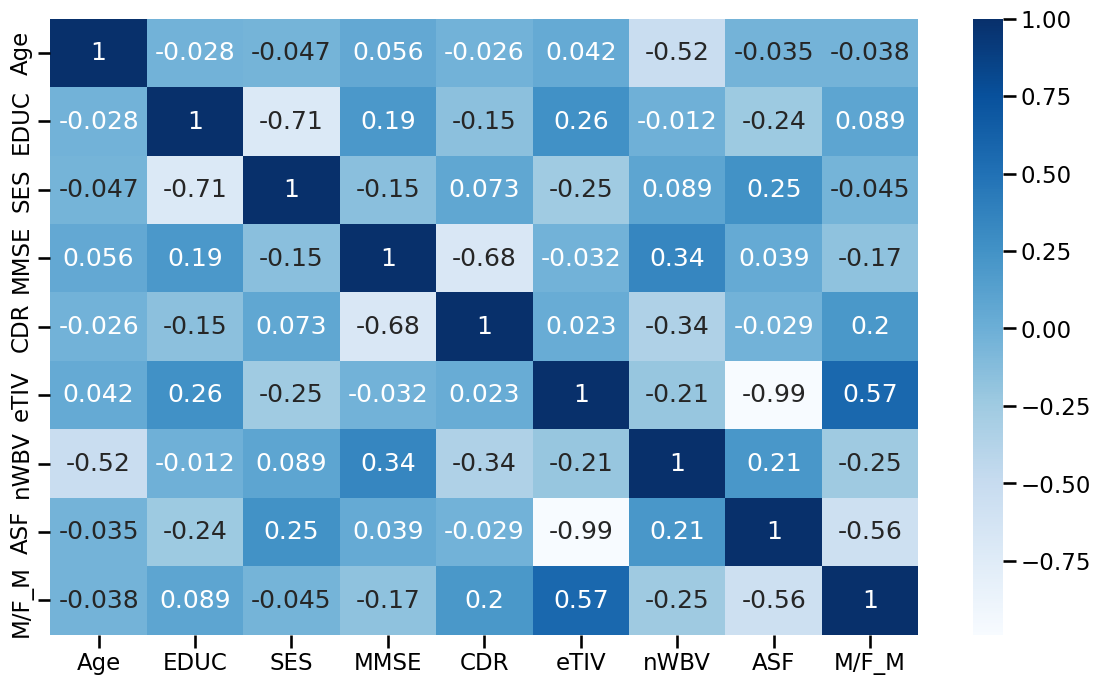

In [24]:
#Visualizing the Correlation among independent variables

plt.figure(figsize=(14,8))

corr = new_X.corr()

sns.heatmap(corr, 
        cmap="Blues", annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Feature Scaling using StandardScaler

In [25]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)    
X_test = ss.transform(X_test)         

## Model Development

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train,Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
Y_pred=LRC.predict(X_test)
Y_pred

array([1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(Y_test,Y_pred)
print(cm_lr)

[[ 4  0  3]
 [ 1 42  0]
 [ 0  1 61]]


<AxesSubplot:>

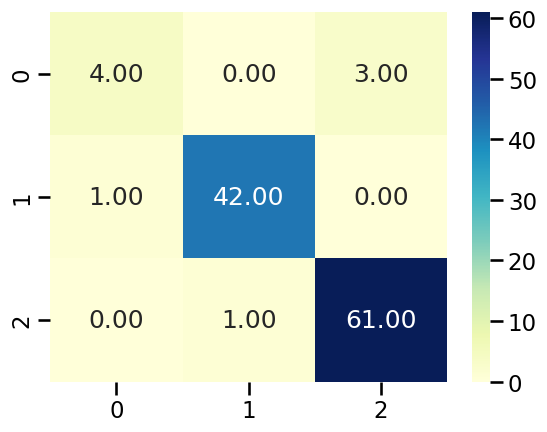

In [29]:
#visualizing the confusion matrix

sns.heatmap(cm_lr, annot=True, fmt='.2f', cmap="YlGnBu")

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)

95.53571428571429


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.98      0.98      0.98        43
           2       0.95      0.98      0.97        62

    accuracy                           0.96       112
   macro avg       0.91      0.84      0.87       112
weighted avg       0.95      0.96      0.95       112



### Decision Tree (entropy)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
Y_pred1=DTC.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)

[[ 2  2  3]
 [ 3 40  0]
 [ 4  1 57]]


<AxesSubplot:>

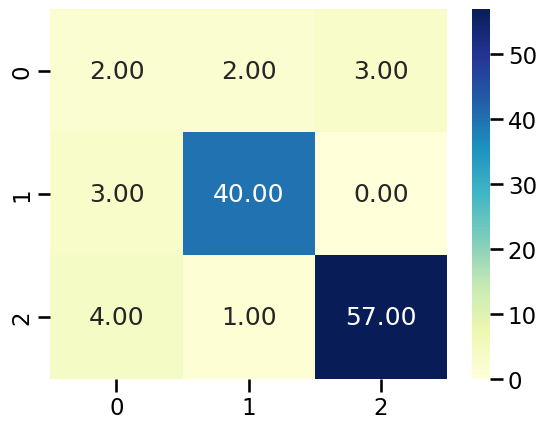

In [36]:
#visualizing the confusion matrix

sns.heatmap(cm1, annot=True, fmt='.2f', cmap="YlGnBu")

In [37]:
from sklearn.metrics import accuracy_score
cm_score1=accuracy_score(Y_test,Y_pred1)
print(cm_score1*100)

88.39285714285714


In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.93      0.93      0.93        43
           2       0.95      0.92      0.93        62

    accuracy                           0.88       112
   macro avg       0.70      0.71      0.70       112
weighted avg       0.90      0.88      0.89       112



### Decision Tree (gini)

In [39]:
DTC=DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
Y_pred2=DTC.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test,Y_pred2)
print(cm2)

[[ 2  2  3]
 [ 3 40  0]
 [ 3  1 58]]


<AxesSubplot:>

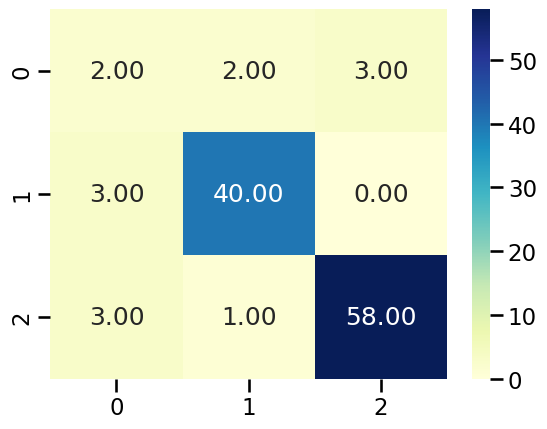

In [42]:
#visualizing the confusion matrix

sns.heatmap(cm2, annot=True, fmt='.2f', cmap="YlGnBu")

In [43]:
from sklearn.metrics import accuracy_score
cm_score2=accuracy_score(Y_test,Y_pred2)
print(cm_score2*100)

89.28571428571429


In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.93      0.93      0.93        43
           2       0.95      0.94      0.94        62

    accuracy                           0.89       112
   macro avg       0.71      0.72      0.71       112
weighted avg       0.90      0.89      0.90       112



### KNN (k-nearest neighbour)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [47]:
Y_pred_knn=knn.predict(X_test)
Y_pred_knn

C:\Users\91701\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [48]:
cm_knn=confusion_matrix(Y_test,Y_pred_knn)
print(cm_knn)

[[ 3  1  3]
 [ 3 38  2]
 [ 1  0 61]]


<AxesSubplot:>

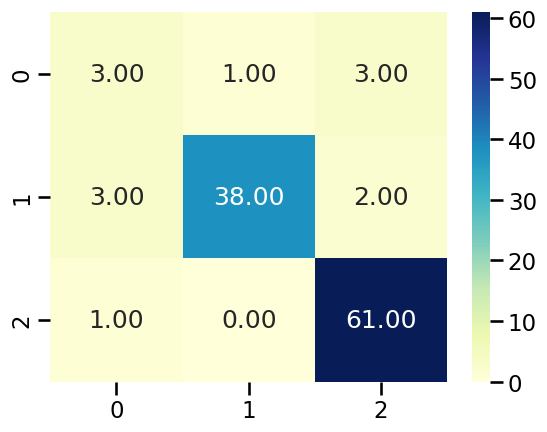

In [49]:
#visualizing the confusion matrix

sns.heatmap(cm_knn, annot=True, fmt='.2f', cmap="YlGnBu")

In [50]:
cm_score_k=accuracy_score(Y_test,Y_pred_knn)*100
print(cm_score_k)

91.07142857142857


In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.97      0.88      0.93        43
           2       0.92      0.98      0.95        62

    accuracy                           0.91       112
   macro avg       0.78      0.77      0.77       112
weighted avg       0.91      0.91      0.91       112



### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [53]:
# Prediction
Y_pred_nb=nb.predict(X_test)

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print(cm_nb)

[[ 4  1  2]
 [ 6 37  0]
 [ 0  1 61]]


<AxesSubplot:>

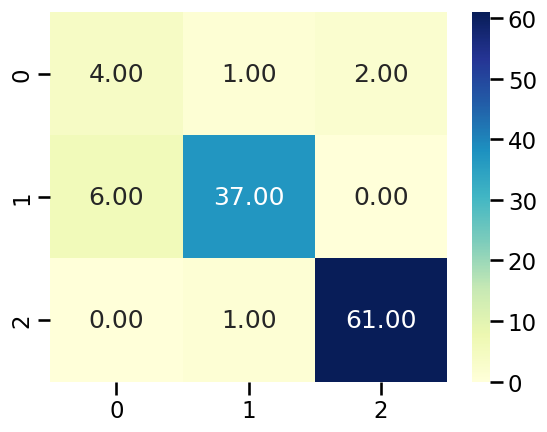

In [55]:
#visualizing the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='.2f', cmap="YlGnBu")

In [56]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_nb)*100

91.07142857142857

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.95      0.86      0.90        43
           2       0.97      0.98      0.98        62

    accuracy                           0.91       112
   macro avg       0.77      0.81      0.78       112
weighted avg       0.93      0.91      0.92       112



## Results

#### Following are the results of the proposed models - using Standard Scaler
S.No  |  Model  |  Accuracy (%)
:---------:|:------:|:--------------------|
1|Logistic Regression| 95.5
2|Decision Tree (Entropy) | 85.7
3|Decision Tree (Gini) | 89.28
4|KNN | 91.07
5|Naive Bayes | 91.07

## Feature Scaling using MinMaxScaler

In [58]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)    
X_test = mms.transform(X_test)         

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train,Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
Y_pred=LRC.predict(X_test)
Y_pred

array([1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(Y_test,Y_pred)
print(cm_lr)

[[ 1  2  4]
 [ 0 43  0]
 [ 0  1 61]]


<AxesSubplot:>

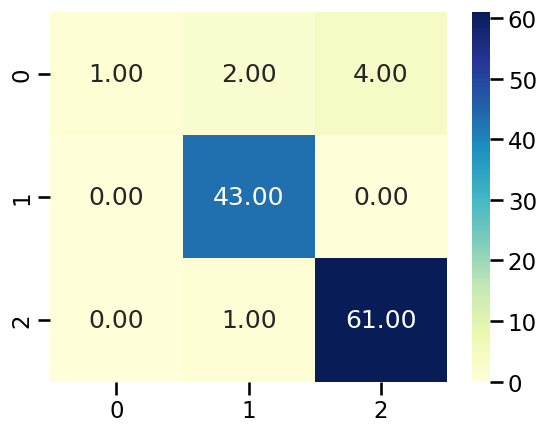

In [62]:
#visualizing the confusion matrix

sns.heatmap(cm_lr, annot=True, fmt='.2f', cmap="YlGnBu")

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)

93.75


In [64]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.93      1.00      0.97        43
           2       0.94      0.98      0.96        62

    accuracy                           0.94       112
   macro avg       0.96      0.71      0.73       112
weighted avg       0.94      0.94      0.92       112



### Decision Tree (entropy)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
Y_pred1=DTC.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)

[[ 2  2  3]
 [ 3 40  0]
 [ 3  1 58]]


<AxesSubplot:>

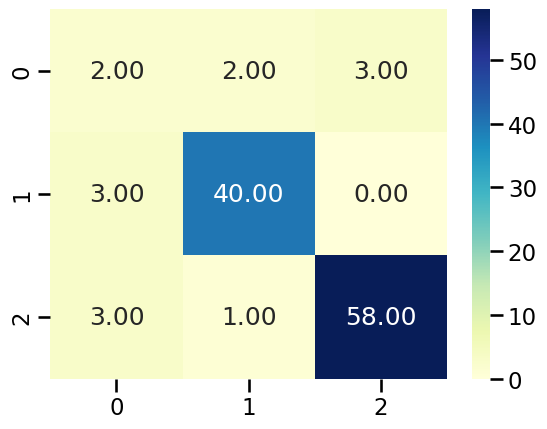

In [69]:
#visualizing the confusion matrix

sns.heatmap(cm1, annot=True, fmt='.2f', cmap="YlGnBu")

In [70]:
from sklearn.metrics import accuracy_score
cm_score1=accuracy_score(Y_test,Y_pred1)
print(cm_score1*100)

89.28571428571429


In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.93      0.93      0.93        43
           2       0.95      0.94      0.94        62

    accuracy                           0.89       112
   macro avg       0.71      0.72      0.71       112
weighted avg       0.90      0.89      0.90       112



### Decision Tree (gini)

In [72]:
DTC=DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
Y_pred2=DTC.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test,Y_pred2)
print(cm2)

[[ 2  2  3]
 [ 3 40  0]
 [ 3  1 58]]


<AxesSubplot:>

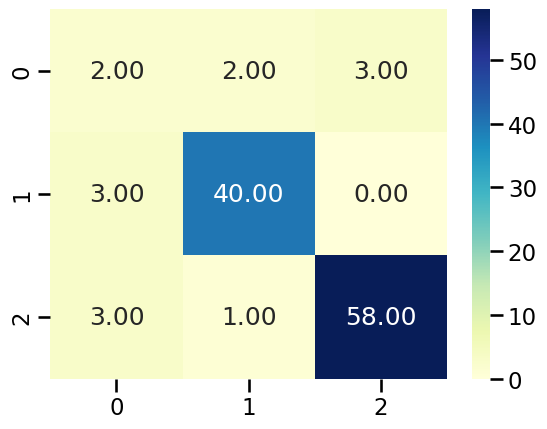

In [75]:
#visualizing the confusion matrix

sns.heatmap(cm2, annot=True, fmt='.2f', cmap="YlGnBu")

In [76]:
from sklearn.metrics import accuracy_score
cm_score2=accuracy_score(Y_test,Y_pred2)
print(cm_score2*100)

89.28571428571429


In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.93      0.93      0.93        43
           2       0.95      0.94      0.94        62

    accuracy                           0.89       112
   macro avg       0.71      0.72      0.71       112
weighted avg       0.90      0.89      0.90       112



### KNN (k-nearest neighbour)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [80]:
Y_pred_knn=knn.predict(X_test)
Y_pred_knn

C:\Users\91701\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [81]:
cm_knn=confusion_matrix(Y_test,Y_pred_knn)
print(cm_knn)

[[ 3  1  3]
 [ 3 37  3]
 [ 1  0 61]]


<AxesSubplot:>

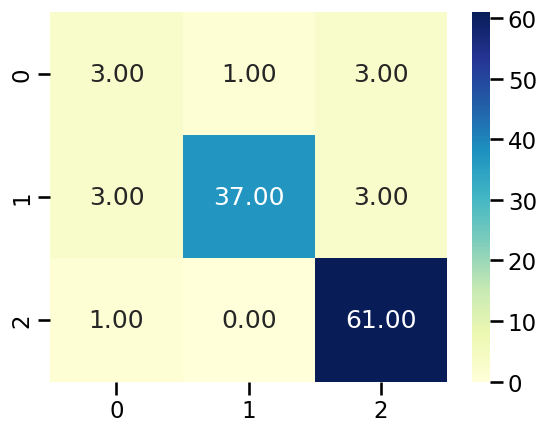

In [82]:
#visualizing the confusion matrix

sns.heatmap(cm_knn, annot=True, fmt='.2f', cmap="YlGnBu")

In [83]:
cm_score_k=accuracy_score(Y_test,Y_pred_knn)*100
print(cm_score_k)

90.17857142857143


In [84]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.97      0.86      0.91        43
           2       0.91      0.98      0.95        62

    accuracy                           0.90       112
   macro avg       0.77      0.76      0.76       112
weighted avg       0.90      0.90      0.90       112



### Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)

C:\Users\91701\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [86]:
# Prediction
Y_pred_nb=nb.predict(X_test)

In [87]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print(cm_nb)

[[ 4  1  2]
 [ 6 37  0]
 [ 0  1 61]]


<AxesSubplot:>

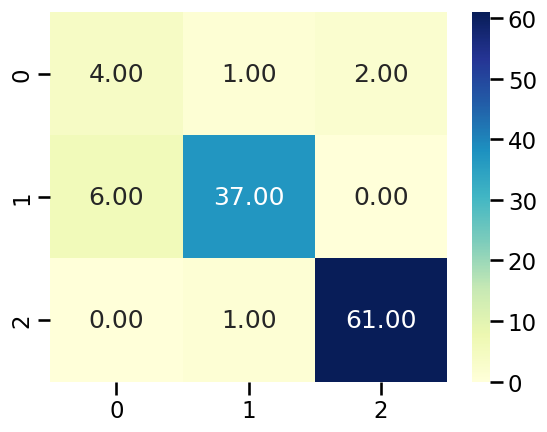

In [88]:
#visualizing the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='.2f', cmap="YlGnBu")

In [89]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_nb)*100

91.07142857142857

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.95      0.86      0.90        43
           2       0.97      0.98      0.98        62

    accuracy                           0.91       112
   macro avg       0.77      0.81      0.78       112
weighted avg       0.93      0.91      0.92       112



## Results

#### Following are the results of the proposed models - using MinMax Scaler
S.No  |  Model  |  Accuracy (%)
:---------:|:------:|:--------------------|
1|Logistic Regression| 93.75
2|Decision Tree (Entropy) | 89.28
3|Decision Tree (Gini) | 89.28
4|KNN | 90.17
5|Naive Bayes | 91.07